# Sample

## affine transformation

by rotation + shifting

In [7]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../lena.png')

### case1. rotation 45 > scale 0..5 > shift (x+100, y-50)  
`cv2.getRotationMatrix2D(center, angle, scale)`

In [3]:
rows, cols = img.shape[:2]

M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5)
print('Rotation Matrix')
print(M_rotate)

Rotation Matrix
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]



In [5]:
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)
print('Translation Matrix')
print(M_translate)

Translation Matrix
[[  1.   0. 100.]
 [  0.   1. -50.]]


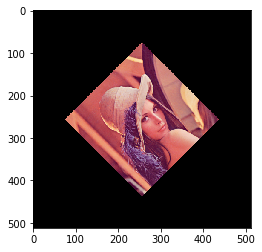

In [12]:
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))
plt.imshow(img_rotate[:, :, ::-1])

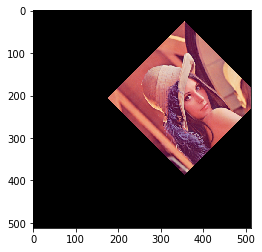

In [13]:
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (cols, rows))
plt.imshow(img_rotate_trans[:, :, ::-1])

In [15]:
img_show_rotate_trans = np.hstack((img, img_rotate, img_rotate_trans))
while True:
    cv2.imshow('Rotate 45, scale 0.5, Translate x+100, y-50', img_show_rotate_trans)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

# HW

### case2.

> pick 3 points

In [17]:
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

In [18]:
M_affine = cv2.getAffineTransform(pt1, pt2)
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

In [21]:
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1)

In [22]:
img_show_affine = np.hstack((img_copy, img_affine))
while True:
    cv2.imshow('affine transformation', img_show_affine)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break